In [3]:
import json
import requests
import pandas as pd
import time
from scipy.spatial import distance
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# read in geneshot query terms
query_df = pd.read_excel("/Users/maayanlab/Downloads/for_geneshot.xlsx")
query_df = query_df[["Phenotype Code", "Phenotype Description"]]
query_df

,Phenotype Code,Phenotype Description
0,20001_1001,lung cancer
1,20001_1002,breast cancer
2,20001_1003,skin cancer
3,20001_1006,larynx cancer
4,20001_1006,throat cancer
5,20001_1011,tongue cancer
6,20001_1017,esophageal cancer
7,20001_1018,stomach cancer
8,20001_1019,small intestine cancer
9,20001_1019,small bowel cancer


In [5]:
queries = query_df["Phenotype Description"].to_list()
queries[:5]

['lung cancer',
 'breast cancer',
 'skin cancer',
 'larynx cancer',
 'throat cancer']

In [6]:
IDs = query_df["Phenotype Code"].to_list()
IDs[:5]

['20001_1001', '20001_1002', '20001_1003', '20001_1006', '20001_1006']

In [7]:
def get_genelist(search_term):
    GENESHOT_URL = 'http://maayanlab.cloud/geneshot/api'
    query_string = '/search/auto/%s'
    response = requests.get(GENESHOT_URL + query_string % (search_term))
    
    if not response.ok:
        return search_term, []
        
    data = json.loads(response.text)
    
    ranked_genes_df = pd.DataFrame(columns=['Gene', 'Total*Frac'])
    for key, value in data['gene_count'].items():
        ranked_genes_df = ranked_genes_df.append({'Gene' : key, 'Total*Frac' : value[0]*value[1]}, ignore_index=True)
    ranked_genes_df = ranked_genes_df.sort_values(by=['Total*Frac'], ascending=False).reset_index(drop=True)
    gene_list = ranked_genes_df['Gene'].tolist()
    
    return search_term, gene_list

In [8]:
geneshot_results = pd.DataFrame(columns=["Phenotype Code", "Search Term", "Geneshot Genes"])

for i in range(len(queries)):
    if i % 10 == 0:
        print('running term %d of %d' % (i, len(queries)))
    term, genelist = get_genelist(queries[i])
    geneshot_results = geneshot_results.append({'Phenotype Code' : IDs[i], 'Search Term' : queries[i], 'Geneshot Genes' : genelist}, ignore_index=True)
    time.sleep(0.1)
geneshot_results

running term 0 of 1760
running term 10 of 1760
running term 20 of 1760
running term 30 of 1760
running term 40 of 1760
running term 50 of 1760
running term 60 of 1760
running term 70 of 1760
running term 80 of 1760
running term 90 of 1760
running term 100 of 1760
running term 110 of 1760
running term 120 of 1760
running term 130 of 1760
running term 140 of 1760
running term 150 of 1760
running term 160 of 1760
running term 170 of 1760
running term 180 of 1760
running term 190 of 1760
running term 200 of 1760
running term 210 of 1760
running term 220 of 1760
running term 230 of 1760
running term 240 of 1760
running term 250 of 1760
running term 260 of 1760
running term 270 of 1760
running term 280 of 1760
running term 290 of 1760
running term 300 of 1760
running term 310 of 1760
running term 320 of 1760
running term 330 of 1760
running term 340 of 1760
running term 350 of 1760
running term 360 of 1760
running term 370 of 1760
running term 380 of 1760
running term 390 of 1760
running ter

,Phenotype Code,Search Term,Geneshot Genes
0,20001_1001,lung cancer,"[EGFR, ALK, KRAS, EML4, ROS1, ERCC1, CEACAM5, ..."
1,20001_1002,breast cancer,"[ERBB2, BRCA1, BRCA2, PGR, ABCG2, EGFR, PALB2,..."
2,20001_1003,skin cancer,"[NRAS, MC1R, MITF, MLANA, CYLD, FH, FLCN, CD34..."
3,20001_1006,larynx cancer,"[MYCT1, ISY1, NME1, ZNF706, TFG, CCND1, DCUN1D..."
4,20001_1006,throat cancer,"[SLC44A3, CASD1, SPOCD1, FCRL2, ZNF671, HHATL,..."
5,20001_1011,tongue cancer,"[ZNF471, ANAPC4, KRT36, KRT77, EWSR1, KRT76, K..."
6,20001_1017,esophageal cancer,"[SPINK7, ALDH2, TMPRSS11A, DLEC1, EGFR, HGD, A..."
7,20001_1018,stomach cancer,"[CDH1, MUC6, ERBB2, CEACAM5, CDX2, TFF1, RUNX3..."
8,20001_1019,small intestine cancer,"[KIT, LGR5, CDX2, PDGFRA, ABCG2, SMIM3, CDX1, ..."
9,20001_1019,small bowel cancer,"[KIT, PDGFRA, LGR5, CDX2, MSH2, MLH1, MUC6, CD..."


In [46]:
geneshot_results.drop(columns=["Combined Geneshot Genes"], inplace=True)
geneshot_results

,Phenotype Code,Search Term,Geneshot Genes
0,20001_1001,lung cancer,"[EGFR, ALK, KRAS, EML4, ROS1, ERCC1, CEACAM5, ..."
1,20001_1002,breast cancer,"[ERBB2, BRCA1, BRCA2, PGR, ABCG2, EGFR, PALB2,..."
2,20001_1003,skin cancer,"[NRAS, MC1R, MITF, MLANA, CYLD, FH, FLCN, CD34..."
3,20001_1006,larynx cancer,"[MYCT1, ISY1, NME1, ZNF706, TFG, CCND1, DCUN1D..."
4,20001_1006,throat cancer,"[SLC44A3, CASD1, SPOCD1, FCRL2, ZNF671, HHATL,..."
5,20001_1011,tongue cancer,"[ZNF471, ANAPC4, KRT36, KRT77, EWSR1, KRT76, K..."
6,20001_1017,esophageal cancer,"[SPINK7, ALDH2, TMPRSS11A, DLEC1, EGFR, HGD, A..."
7,20001_1018,stomach cancer,"[CDH1, MUC6, ERBB2, CEACAM5, CDX2, TFF1, RUNX3..."
8,20001_1019,small intestine cancer,"[KIT, LGR5, CDX2, PDGFRA, ABCG2, SMIM3, CDX1, ..."
9,20001_1019,small bowel cancer,"[KIT, PDGFRA, LGR5, CDX2, MSH2, MLH1, MUC6, CD..."


In [210]:
geneshot_results_comb = geneshot_results.groupby("Phenotype Code").agg({'Geneshot Genes' : 'sum'})
geneshot_results_comb.reset_index(inplace=True)
for i in range(geneshot_results_comb.shape[0]):
    geneshot_results_comb.loc[i, "Geneshot Genes"] = list(set(geneshot_results_comb.loc[i, "Geneshot Genes"]))
geneshot_results_comb

,Phenotype Code,Geneshot Genes
0,20001_1001,"[ERCC5, EZR, IL15, HOXA11, ABCA3, B2M, HP, CCL..."
1,20001_1002,"[TLE3, ERCC5, HBQ1, KIFC1, BCAS2, IL15, FBXO47..."
2,20001_1003,"[ASTE1, COL1A2, SMO, TFPI2, ERCC5, CALB2, DNMT..."
3,20001_1006,"[FJX1, COL1A2, CCNA1, HLTF, ERCC5, ANG, DNMT1,..."
4,20001_1011,"[FJX1, LAMC1, LRPPRC, PARVB, CCNA1, CALB2, SNI..."
5,20001_1017,"[SOX1, COL1A2, ERCC5, DNMT1, FAM135B, ZNF217, ..."
6,20001_1018,"[ZDHHC14, ERCC5, CLDN22, RPL23, FBXO47, PPFIA3..."
7,20001_1019,"[SYT13, CD6, FMO3, TGFB1I1, CALB2, DNMT1, GIPC..."
8,20001_1020,"[ERCC5, IL15, LYPD8, RPL23, CA13, B2M, HP, PTH..."
9,20001_1022,"[CLDN22, IL15, B2M, HP, CCL11, PTH, PRL, PLAU,..."


In [211]:
geneshot_results_comb.to_csv('/Users/maayanlab/Desktop/geneshot_results_combined.csv', index=False)

In [212]:
phenotype_codes = pd.read_csv('/Users/maayanlab/Downloads/phenotype_codes.csv', encoding='latin1')
def make_mylibrary(gmt_file):
    with open(gmt_file) as f:
        lines = f.readlines()
    lines = [x.strip() for x in lines]
    my_library_df = pd.DataFrame(columns=["GMT Code", "My Genes"])
    for line in lines:
        splt = line.split('\t')
        my_library_df = my_library_df.append({"GMT Code" : splt[0], "My Genes" : splt[1:]}, ignore_index=True)
    my_library_withID = my_library_df.merge(phenotype_codes[["Phenotype Code", "GMT Code"]], on=["GMT Code"])
    my_library_withID = my_library_withID[["Phenotype Code", "GMT Code", "My Genes"]]

    return my_library_withID

In [219]:
def create_data_df(my_library):
    return my_library.merge(geneshot_results_comb, on=["Phenotype Code"])

In [223]:
def jaccardIndex(listA, listB):
    intersection = len(set(listA) & set(listB))
    JI = intersection / (len(listA) + len(listB) - intersection)
    return JI

In [224]:
def get_jaccard(data):   
    jaccard_idx = []
    for i in range(data.shape[0]):
        my_genes = data.loc[i, "My Genes"]
        geneshot_genes = data.loc[i, "Geneshot Genes"]
        jaccard_idx.append(jaccardIndex(my_genes, geneshot_genes))
    return jaccard_idx

In [256]:
def perform_fisher(data):
    odds_ratios = []
    p_values = []
    for i in range(data.shape[0]):
        my_genes = data.loc[i, "My Genes"]
        geneshot_genes = data.loc[i, "Geneshot Genes"]
        # A = my_genes
        # B = geneshot_genes
        union = list(set(my_genes) | set(geneshot_genes))
        notA_notB = 20805 - len(union)
        notB_inA = len([x for x in my_genes if x not in geneshot_genes])
        inB_notA = len([x for x in geneshot_genes if x not in my_genes])
        inA_inB = len([x for x in my_genes if x in geneshot_genes])
        contingency_table = [[notA_notB, notB_inA], [inB_notA, inA_inB]]
        odds_ratio, p_value = stats.fisher_exact(contingency_table)
        p_value = - np.log(p_value)
        odds_ratios.append(odds_ratio)
        p_values.append(p_value)
    return odds_ratios, p_values

In [257]:
p6_geneset_lib = make_mylibrary('/Users/maayanlab/Desktop/ukbiobank_p6.gmt')
p6_data = create_data_df(p6_geneset_lib)
p6_jaccard = get_jaccard(p6_data)
p6_oddsratio, p6_pvals = perform_fisher(p6_data)

p6_df = pd.DataFrame()
p6_df["Jaccard Index"] = p6_jaccard
p6_df["Odds Ratio"] = p6_oddsratio
p6_df["-log10 Fisher P-Values"] = p6_pvals
p6_df["p-value"] = ["p < 5e-6"] * len(p6_jaccard)

In [258]:
p7_geneset_lib = make_mylibrary('/Users/maayanlab/Desktop/ukbiobank_p7.gmt')
p7_data = create_data_df(p7_geneset_lib)
p7_jaccard = get_jaccard(p7_data)
p7_oddsratio, p7_pvals = perform_fisher(p7_data)

p7_df = pd.DataFrame()
p7_df["Jaccard Index"] = p7_jaccard
p7_df["Odds Ratio"] = p7_oddsratio
p7_df["-log10 Fisher P-Values"] = p7_pvals
p7_df["p-value"] = ["p < 5e-7"] * len(p7_jaccard)

In [259]:
p8_geneset_lib = make_mylibrary('/Users/maayanlab/Desktop/ukbiobank_p8.gmt')
p8_data = create_data_df(p8_geneset_lib)
p8_jaccard = get_jaccard(p8_data)
p8_oddsratio, p8_pvals = perform_fisher(p8_data)

p8_df = pd.DataFrame()
p8_df["Jaccard Index"] = p8_jaccard
p8_df["Odds Ratio"] = p8_oddsratio
p8_df["-log10 Fisher P-Values"] = p8_pvals
p8_df["p-value"] = ["p < 5e-8"] * len(p8_jaccard)

In [260]:
p9_geneset_lib = make_mylibrary('/Users/maayanlab/Desktop/ukbiobank_p9.gmt')
p9_data = create_data_df(p9_geneset_lib)
p9_jaccard = get_jaccard(p9_data)
p9_oddsratio, p9_pvals = perform_fisher(p9_data)

p9_df = pd.DataFrame()
p9_df["Jaccard Index"] = p9_jaccard
p9_df["Odds Ratio"] = p9_oddsratio
p9_df["-log10 Fisher P-Values"] = p9_pvals
p9_df["p-value"] = ["p < 5e-9"] * len(p9_jaccard)

In [261]:
p10_geneset_lib = make_mylibrary('/Users/maayanlab/Desktop/ukbiobank_p10.gmt')
p10_data = create_data_df(p10_geneset_lib)
p10_jaccard = get_jaccard(p10_data)
p10_oddsratio, p10_pvals = perform_fisher(p10_data)

p10_df = pd.DataFrame()
p10_df["Jaccard Index"] = p10_jaccard
p10_df["Odds Ratio"] = p10_oddsratio
p10_df["-log10 Fisher P-Values"] = p10_pvals
p10_df["p-value"] = ["p < 5e-10"] * len(p10_jaccard)

In [262]:
data = pd.concat([p10_df, p9_df, p8_df, p7_df, p6_df])
plt.rc('font', size=12)
plt.rc('axes', titlesize=26)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('figure', titlesize=26)

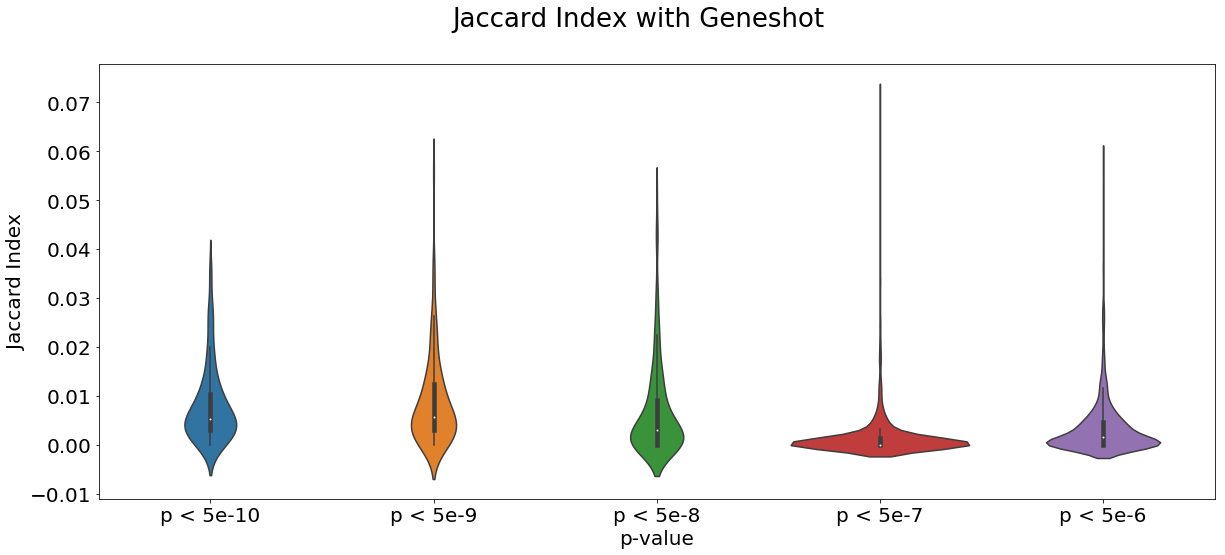

In [266]:
fig, ax = plt.subplots(figsize=(20,8));
sns.violinplot(ax = ax, x = data["p-value"], y = data["Jaccard Index"]);
fig.suptitle("Jaccard Index with Geneshot");
plt.savefig("/Users/maayanlab/Desktop/Jaccard_Index.png")

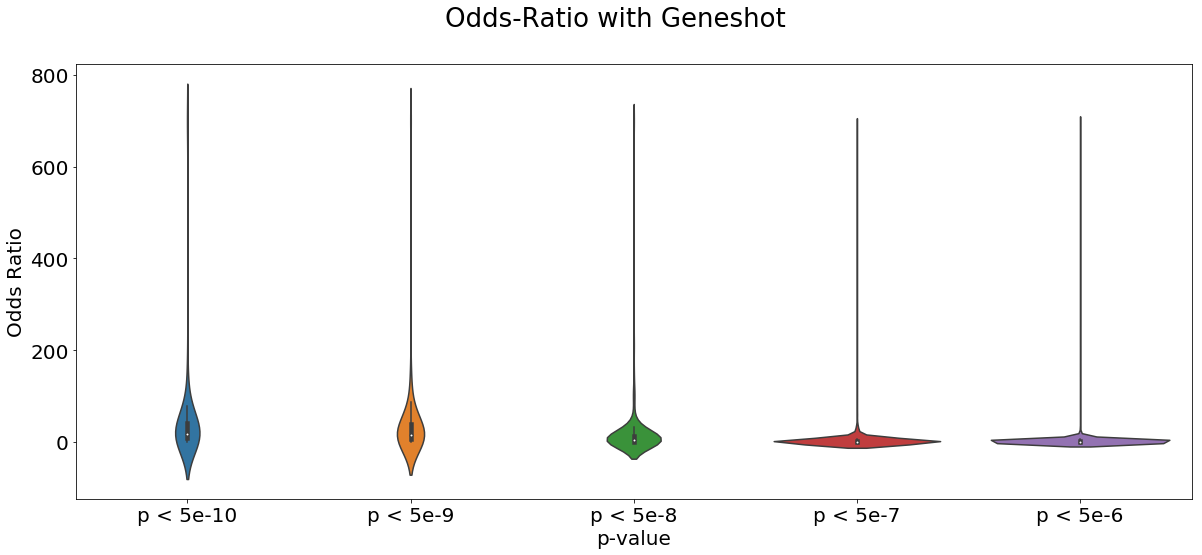

In [267]:
import numpy as np
data["Odds Ratio"].replace(np.nan, 0.0, inplace=True)
data["Odds Ratio"].replace(np.inf, 700.0, inplace=True)
fig, ax = plt.subplots(figsize=(20,8));
sns.violinplot(ax = ax, x = data["p-value"], y = data["Odds Ratio"]);
fig.suptitle("Odds-Ratio with Geneshot");
plt.savefig("/Users/maayanlab/Desktop/Odds_Ratio.png")

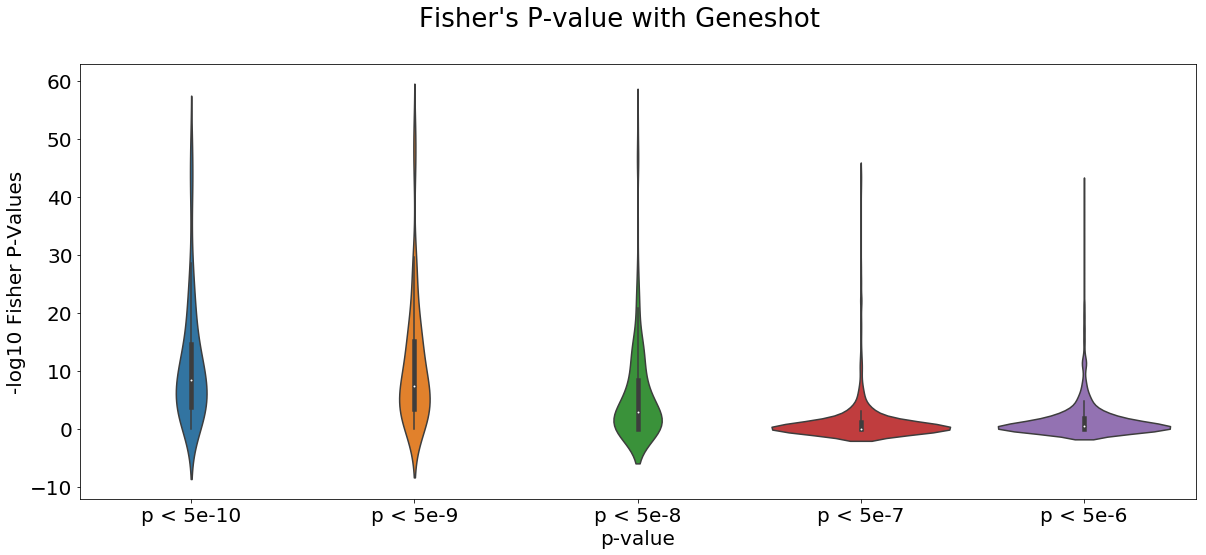

In [268]:
fig, ax = plt.subplots(figsize=(20,8));
sns.violinplot(ax = ax, x = data["p-value"], y = data["-log10 Fisher P-Values"]);
fig.suptitle("Fisher's P-value with Geneshot");
plt.savefig("/Users/maayanlab/Desktop/Fisher_Pval.png")